<a href="https://colab.research.google.com/github/ucfilho/ANN_raianars/blob/master/ANN_parte_009_METRICAS_OUT_04_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# este comando clona o diretorio github ucfilho/ANN no colaboratory research
!git clone https://github.com/RaianaSeixas/ANN #clonar do Github
%cd ANN
#!ls
print("Hello world"+"\n"+"I'm evolving!!!"+"\n")

%matplotlib inline

fatal: destination path 'ANN' already exists and is not an empty directory.
/content/ANN
Hello world
I'm evolving!!!



In [0]:
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
# https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_to_Speed-up_Machine_Learning_Algorithms.ipynb

In [3]:
!ls

000_ANN_Gera_Matriz_para_ser_usada_set_26_2019.ipynb  X_DAT_B_set_17_2019.csv
000_ANN_parte_001_XY_dados_out_01_2019.ipynb	      X_DAT_set_17_2019.csv
000_ANN_parte_002_XY_Métricas_D10_OUT_4_2019.ipynb    XY_D10_out_1_2019.csv
000_Gerenciador_DE_var_F_CR_STAT_set_27_2019.ipynb    Y_DAT_B_set_17_2019.csv
imput_ANN_D10_6F.zip				      Y_DAT_set_17_2019.csv


In [0]:
# sigmoid function
def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

def tasig(x,deriv=False):
    if(deriv==True):
        return 1-x*x
    return 2/(1+np.exp(-2*x))-1

# purelin function
def purelin(x,deriv=False):
    if(deriv==True):
        return 1
    #N=len(x)
    #for i in range(N):
      #if (x[i]>1):
        #x[i]=1
    return x

In [0]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

In [0]:
# funcao retorna os dados a forma original
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [0]:
def R2(yobs,ycal):
  yobs=np.array(yobs)
  ycal=np.array(ycal)
  N=len(yobs)
  SQresiduos=0
  SQexp=0
  ycal_medio=y_calc.mean().item()
  for i in range(N):
    SQresiduos=SQresiduos+(yobs[i]-ycal[i])**2
    SQexp=SQexp+(ycal[i]-ycal_medio)**2
  coef=1-(SQresiduos/SQexp)
  return coef

In [8]:
# leitura dos dados
DAT=pd.read_csv("XY_D10_out_1_2019.csv")
# separa as colunas de interesse
Index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14]
Dat_Select=[]
Dat_Select=DAT.iloc[:,Index].copy()

pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)
#print(Dat_Select)
print(Dat_Select.head())

   DIVERSIDADE (DI)  DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X     NP  \
0         21.655535     1.221355       0.2         0.0      0.0  100.0   
1         21.514089     1.213378       0.3         0.0      0.0  100.0   
2         21.295827     1.201068       0.4         2.0      2.0  100.0   
3         21.188552     1.195018       0.5         0.0      0.0  100.0   
4         21.769821     1.227801       0.6         1.0      2.0  100.0   

         Fo       CRo      fmin         fmax   AD_fmin   AD_fmax         F  \
0  0.972856  0.760538  0.057549  1805.235510  1.000000  0.374682  0.277668   
1  0.277668  0.260366  0.057549   317.197512  1.000000  0.065835  0.173981   
2  0.173981  0.453169  0.022278    49.847938  0.387115  0.010346  0.677145   
3  0.677145  0.947536  0.022278    33.373213  0.387115  0.006927  0.059762   
4  0.059762  0.155327  0.014697     9.059640  0.255377  0.001880  0.949367   

         CR  
0  0.260366  
1  0.453169  
2  0.947536  
3  0.155327  
4  0.933255  


In [0]:
DAT_OLD=[]
DAT_OLD=Dat_Select.copy()
DAT=Normatiza(Dat_Select)

In [10]:
# obtem as variaveis independentes (treino e teste)
# separa os dados em treino e teste
train=DAT.sample(frac=0.8,random_state=None) 
test=DAT.drop(train.index)
x_train=train.iloc[:,[1,2,3,4,6,7,10,11]]
x_test=test.iloc[:,[1,2,3,4,6,7,10,11]]
X_OLD=DAT_OLD.iloc[:,[1,2,3,4,6,7,10,11]]
print(x_train.head())

    DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X        Fo       CRo   AD_fmin  \
36    -0.415047      -1.0         1.0      1.0 -0.369618 -0.879501 -0.994059   
49    -0.695994       0.0         0.0      1.0 -0.430203 -0.162475 -0.197878   
38    -0.764240      -0.5         1.0      1.0 -0.051475 -0.660595 -0.999716   
20     0.885640      -0.5         0.0      1.0  0.600665 -0.516720  0.359514   
2      0.659696      -0.5         1.0      1.0 -0.662875 -0.068933 -0.225770   

     AD_fmax  
36 -0.265591  
49  0.901072  
38 -0.966230  
20  0.371469  
2  -0.979288  


In [11]:
# obtem as variaveis dependentes (treino e teste)
#Index=[2,3,4,5]
Index=[12] #F
#Index=[13] #CR
y_train=train.iloc[:,Index]
y_test=test.iloc[:,Index]
Y_OLD=DAT_OLD.iloc[:,Index]
print(y_train.head())

           F
36 -0.628877
49  0.495032
38 -0.464242
20  0.241763
2   0.362938


In [0]:
X_NOME=[  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','Fo','CRo',
           'AD_fmin','AD_fmax']
Y_NOME=['F']   
#Y_NOME=['CR']   

In [13]:
# input dataset
#Neuron_input=3
Neuron_input=len(X_NOME)
print(Neuron_input)
Neuron_hidden=5
Neuron_output=1
Learning_rate=0.01
omega=0.9
Epoch=200000

8


In [0]:
Y_train=y_train
X_train=x_train
x_test=x_test.loc[x_test['FRAC Its']==x_test['FRAC Its'],X_NOME].values
X_train=X_train.loc[X_train['FRAC Its']==X_train['FRAC Its'],X_NOME].values
y=Y_train.loc[Y_train['F']==Y_train['F'],['F']].values

In [0]:
def ANN(Epoch,Neuron_input,Neuron_hidden,Neuron_output,Learning_rate,X_train,y):
  syn0 = 2*np.random.random((Neuron_input,Neuron_hidden)) - 1
  syn1 = 2*np.random.random((Neuron_hidden,Neuron_output)) - 1
  for j in range(Epoch):
    l0 = X_train
    l1 = sigmoid(np.dot(l0,syn0))
    l2 = purelin(np.dot(l1,syn1))
    l2_error = y - l2
    l2_delta = l2_error*purelin(l2,deriv=True)
    l1_error = l2_delta.dot(syn1.T)
    l1_delta = l1_error * sigmoid(l1,deriv=True)
    syn1 += l1.T.dot(l2_delta)*Learning_rate
    syn0 += l0.T.dot(l1_delta)*Learning_rate
  return syn0,syn1



In [0]:
def ANN_ycal(syn0,syn1,X_train):
  l0 = X_train
  l1 = sigmoid(np.dot(l0,syn0))
  l2 = purelin(np.dot(l1,syn1))
  y_calc=np.reshape(l2,len(l2))
  return y_calc

In [0]:
def QUALIDADE(yobs,ycal):
  #yobs=yobs.to_numpy()
  yobs=np.array(yobs)
  #ycal=ycal.to_numpy()
  ycal=np.array(ycal)
  N=len(yobs)
  Soma=0
  for i in range(N):
    Soma=Soma+(yobs[i]-ycal[i])**2
  Soma=(Soma/N)**0.5
  return Soma


In [0]:
 syn0,syn1=ANN(Epoch,Neuron_input,Neuron_hidden,Neuron_output,Learning_rate,X_train,y)

In [19]:
#'''
#DAT=pd.read_csv(Arquivo,sep='\t')
y_obs=y_train
y_calc=ANN_ycal(syn0,syn1,X_train)
Erro_treino=QUALIDADE(y_obs,y_calc)
print("Erro treino=",Erro_treino)
y_obs=y_test
y_calc=ANN_ycal(syn0,syn1,x_test)
Erro_teste=QUALIDADE(y_obs,y_calc)
print("Erro teste=",Erro_teste)

Erro treino= [0.04175341]
Erro teste= [0.7952421]


In [20]:
Num=20
NH=5
Neuron_hidden=NH
syn0,syn1=ANN(Epoch,Neuron_input,Neuron_hidden,Neuron_output,Learning_rate,X_train,y)
y_obs=y_train
y_calc=ANN_ycal(syn0,syn1,X_train)
Erro_treino=QUALIDADE(y_obs,y_calc)
y_obs=y_test
y_calc=ANN_ycal(syn0,syn1,x_test)
Erro_teste=QUALIDADE(y_obs,y_calc)

print("resultados com o PCA")
print("Neronios=",NH,"Erro teste=",Erro_teste, "Erro treino=",Erro_treino)
  
print("Melhor Neuronios oculto=",NH)


resultados com o PCA
Neronios= 5 Erro teste= [0.80203105] Erro treino= [0.03359697]
Melhor Neuronios oculto= 5


In [0]:
# Make an instance of the Model
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
from sklearn.decomposition import PCA

#pca = PCA(.95)
pca = PCA(n_components=5)
xtrain_pca =pca.fit_transform(x_train)
xtest_pca =pca.fit_transform(x_test)
#xtrain_pca = pca.transform(x_train)
#xtest_pca = pca.transform(x_test)
#print(xtrain_pca)

In [22]:
Num=20
NH=9
Neuron_hidden=NH
Neuron_input=len(xtrain_pca[0,:])
syn0,syn1=ANN(Epoch,Neuron_input,Neuron_hidden,Neuron_output,Learning_rate,xtrain_pca,y)
y_obs_train=y_train
y_calc_train=ANN_ycal(syn0,syn1,xtrain_pca)
Erro_treino=QUALIDADE(y_obs_train,y_calc_train)
y_obs_test=y_test
y_calc_test=ANN_ycal(syn0,syn1,xtest_pca)
Erro_teste=QUALIDADE(y_obs_test,y_calc_test)

print("Com o PCA")

print("Neronios=",NH,"Erro teste=",Erro_teste, "Erro treino=",Erro_treino)
  
print("Melhor Neuronios oculto=",NH)

Com o PCA
Neronios= 9 Erro teste= [2.57026387] Erro treino= [0.01270888]
Melhor Neuronios oculto= 9


In [23]:
print(Neuron_input)

5


In [24]:
R2_treino=R2(y_obs_train,y_calc_train)
print("RMSE treino=",Erro_treino, 'R2_treino',R2_treino)
Erro_teste=QUALIDADE(y_obs_test,y_calc_test)
R2_teste=R2(y_obs_test,y_calc_test)
print("RMSE teste=",Erro_teste,'R2_teste',R2_teste)

RMSE treino= [0.01270888] R2_treino [0.99951488]
RMSE teste= [2.57026387] R2_teste [-0.12670127]


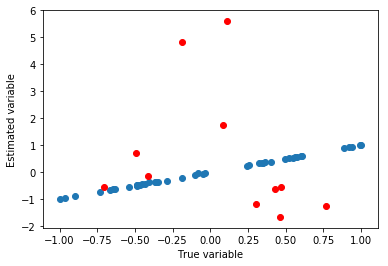

In [25]:
plt.scatter(y_obs_train,y_calc_train)
plt.scatter(y_obs_test,y_calc_test,color='r')
plt.xlabel("True variable")
plt.ylabel("Estimated variable")

#plt.xlim((-0.5,2))
#plt.ylim((-0.5,2))
plt.show()

In [26]:
#print(DAT)

    DIVERSIDADE (DI)  DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X  NP  \
0          -0.966910     0.687753     -1.00        -1.0     -1.0 NaN   
1          -0.967127     0.676720     -0.75        -1.0     -1.0 NaN   
2          -0.967460     0.659696     -0.50         1.0      1.0 NaN   
3          -0.967624     0.651328     -0.25        -1.0     -1.0 NaN   
4          -0.966736     0.696668      0.00         0.0      1.0 NaN   
5          -0.966736     0.696667      0.25        -1.0     -1.0 NaN   
6          -0.967451     0.660158      0.50         1.0      1.0 NaN   
7          -0.968345     0.614557      0.75        -1.0     -1.0 NaN   
8          -0.967257     0.670069      1.00         1.0      1.0 NaN   
9          -0.996183    -0.617132     -1.00         1.0      1.0 NaN   
10         -0.997991    -0.798438     -0.75         0.0      1.0 NaN   
11         -0.998890    -0.888682     -0.50         1.0      1.0 NaN   
12         -0.999627    -0.962612     -0.25         1.0      1.0